# 自作ライブラリのインポート

In [8]:
import os
import sys
pardir = os.path.dirname(os.getcwd())
sys.path.append(pardir)

In [9]:
from src.model import SVM,Kernel_SVM

from src import vizualize

# モデル構築

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
name = ["_".join(i.split(" ")[:2]) for i in iris.feature_names]

def show_data(not_target = 0, var_1 = 1, var_2 = 2):
    iris = datasets.load_iris()
    x = iris.data[iris.target != not_target]
    x = (x - np.mean(x, axis = 0))/np.std(x, axis = 0)
    y = iris.target[iris.target !=not_target]
    y = np.where(y ==1, -1, 1)
    
    fig = plt.figure() 
    ax = plt.axes()
    ax.scatter(x[y == -1][:,var_1 ],x[y == -1][:,var_2])
    ax.scatter(x[y == 1][:,var_1 ],x[y == 1][:,var_2])
    plt.show()


# ハードマージンsvm


## データの準備

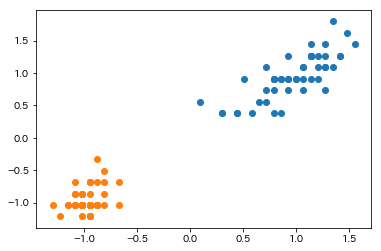

In [11]:
show_data(not_target = 2, var_1 = 2, var_2 =3)

In [12]:


iris = datasets.load_iris()
x = iris.data[iris.target != 2]
x = (x - np.mean(x, axis = 0))/np.std(x, axis = 0)
y = iris.target[iris.target != 2]
y = np.where(y ==0, -1, 1)



var_1 = 2
var_2 = 3
x_data = x
x_data = x_data[:, [var_1,var_2]]
# データを学習用/テスト用に分割している
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y,
                                                    test_size=0.2)

# 自作モデル

In [13]:


model = SVM()
model.fit(x_train, y_train)

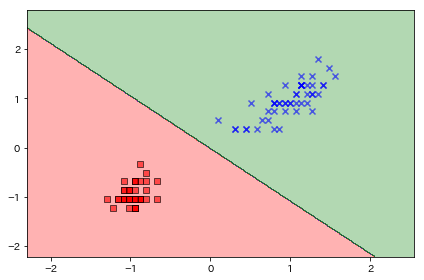

In [14]:
# 可視化

vizualize.viz(x,y,model,var_1,var_2, name = "../fig/hard_magin_svm")


## sklearnで比較

In [15]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

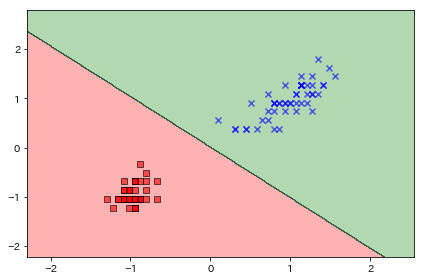

In [16]:

vizualize.viz(x,y,clf,var_1,var_2)

# ソフトマージン

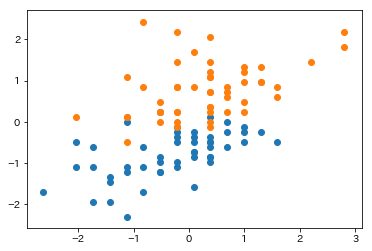

In [17]:
show_data(not_target = 0, var_1 = 1, var_2 =2)

In [18]:


iris = datasets.load_iris()
x = iris.data[iris.target != 0]
x = (x - np.mean(x, axis = 0))/np.std(x, axis = 0)
y = iris.target[iris.target !=0]
y = np.where(y ==1, -1, 1)


    
var_1 = 1
var_2 = 2
x_data = x
x_data = x_data[:, [var_1,var_2]]

# データを学習用/テスト用に分割している
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y,
                                                    test_size=0.2)

# 自作モデル

In [19]:
# 自作モデル

model = SVM()
model.fit(x_train, y_train)

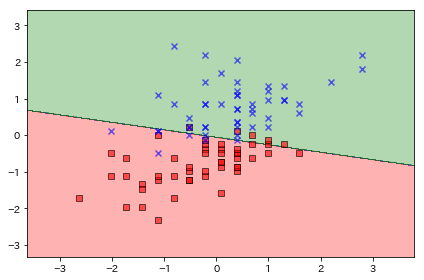

In [20]:
# 可視化

vizualize.viz(x,y,model,var_1,var_2, name = "../fig/soft_magin_svm")

# sklearnモデル

In [21]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

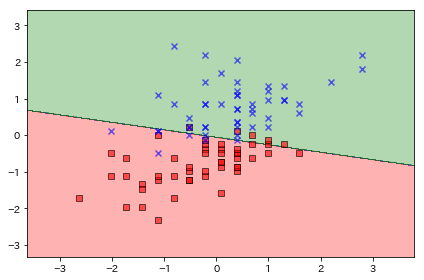

In [22]:
# 可視化

vizualize.viz(x,y,model,var_1,var_2)

# カーネルSVM

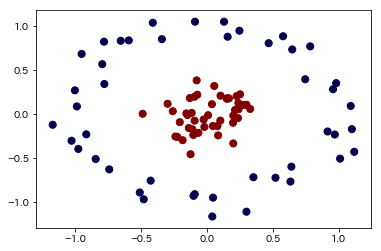

In [23]:
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
X,Y = make_circles(90, factor=0.2, noise=0.1) 
Y =Y*2 -1
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap='seismic')
plt.show()

In [24]:


    
var_1 = 0
var_2 = 1

x_data = X[:, [var_1,var_2]]

# データを学習用/テスト用に分割している
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    Y,
                                                    test_size=0.2)

In [25]:
model = Kernel_SVM()
model.fit(x_train, y_train)

In [26]:
from sklearn.metrics import accuracy_score


for i in [1,5,10,20,100]:
    for j in [0.0001, 0.001,0.01,0.1,1, 10, 100]:
        model = Kernel_SVM(cost=i,gamma = j)
        model.fit(x_train, y_train)
        print("C = {}, gamma = {}".format(i,j))
        print(accuracy_score(y_train,model.predict(x_train)))
        print(model.predict(x_train))
        print("\n")
        

C = 1, gamma = 0.0001
0.5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


C = 1, gamma = 0.001
0.5
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C = 1, gamma = 0.01
0.5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


C = 1, gamma = 0.1
0.5
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C = 1, gamma = 1
0.541666666667
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 

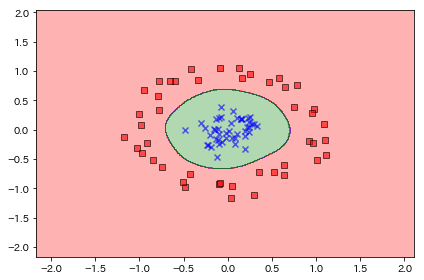

In [27]:
model = Kernel_SVM(cost=10,gamma = 10)
model.fit(x_train, y_train)
vizualize.viz(X,Y,model,var_1,var_2, name = "../fig/kernel_svm")

# カーネルsvm

In [28]:
from sklearn import svm
clf=svm.SVC(kernel='rbf', gamma=1/2 , C=1.0)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
clf.predict(x_train)

array([ 1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1])

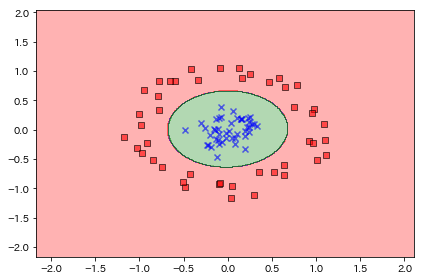

In [30]:
vizualize.viz(X,Y,clf,var_1,var_2)